In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv
from IPython import get_ipython

In [3]:
ds=pd.read_csv('C:\\Users\\Admin\\excel\\framingham.csv')

In [5]:
ds.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [7]:
ds.shape

(4238, 16)

In [9]:
ds.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [13]:
ds.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
#filling the mising values by the mean of the column
ds['education']=ds['education'].fillna(ds['education'].mean())

In [17]:
ds['heartRate']=ds['heartRate'].fillna(ds['heartRate'].mean())
ds['cigsPerDay']=ds['cigsPerDay'].fillna(ds['cigsPerDay'].mean())
ds['BPMeds']=ds['BPMeds'].fillna(ds['BPMeds'].mean())
ds['totChol']=ds['totChol'].fillna(ds['totChol'].mean())
ds['BMI']=ds['BMI'].fillna(ds['BMI'].mean())
ds['TenYearCHD']=ds['TenYearCHD'].fillna(ds['TenYearCHD'].mean())
ds['glucose']=ds['glucose'].fillna(ds['glucose'].mean())

In [19]:
ds.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
ds.shape

(4238, 16)

In [23]:
#to find if there are any duplicate values in our data
ds.duplicated().sum()

0

In [25]:
ds.nunique()

male                  2
age                  39
education             5
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1364
heartRate            74
glucose             144
TenYearCHD            2
dtype: int64

In [27]:
ds['education'].value_counts()

education
1.00000    1720
2.00000    1253
3.00000     687
4.00000     473
1.97895     105
Name: count, dtype: int64

In [29]:
ds['currentSmoker'].unique()

array([0, 1], dtype=int64)

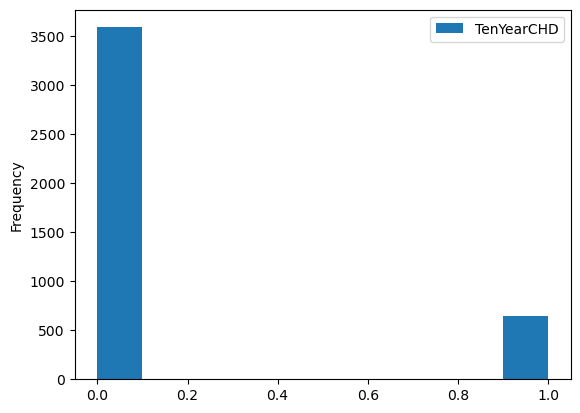

In [31]:
ds.plot.hist(x='currentSmoker',y='TenYearCHD')
plt.show()

In [33]:
#renaming a column
data=ds.rename(columns={'currentSmoker':'currentsmoker'})

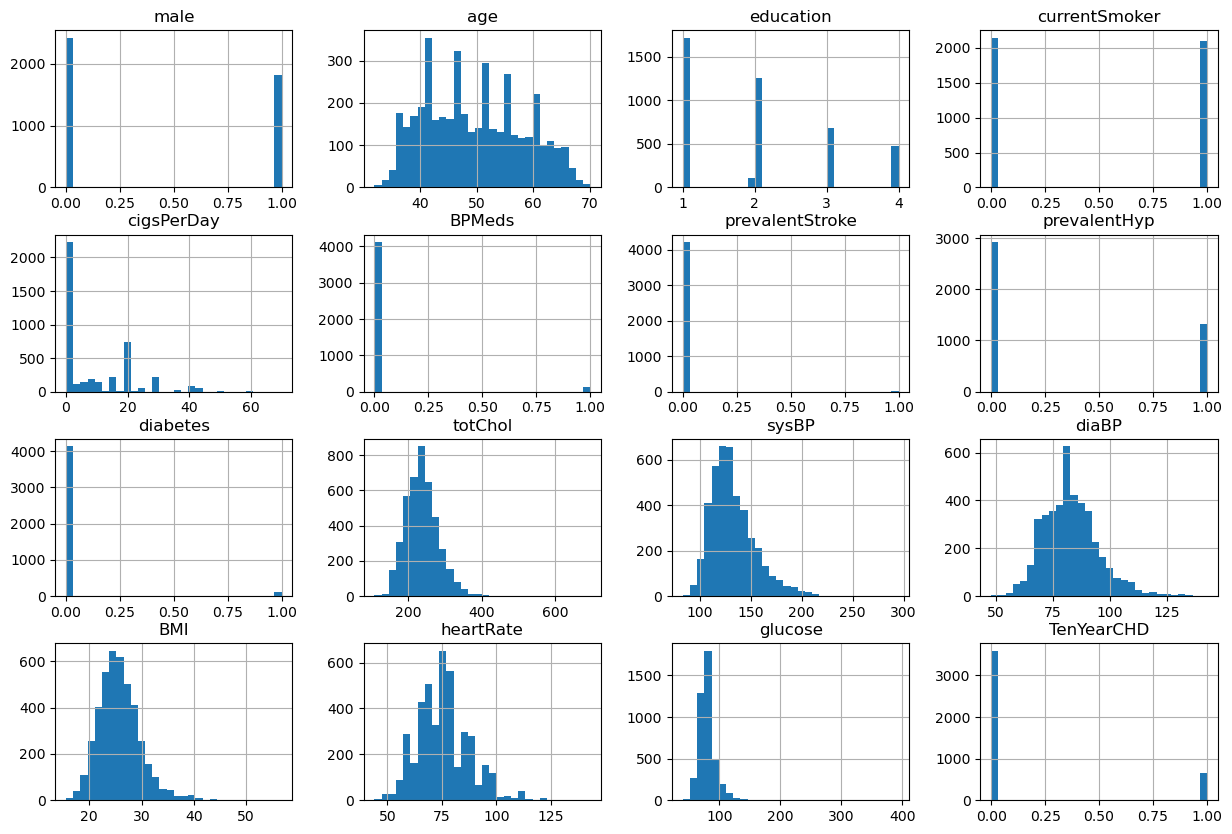

In [35]:
ds.hist(figsize=(15,10),bins=30)
plt.show()

In [37]:
ds.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.007075       0.500024    11.879230   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

           BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4238.00000      4238.000000   4238.000000  4238.000000  4238.000000   
mean      0.02963         0.005899      0.310524     0.025720   236.721585   
std       0.16852         0.076587      0.462763     0.158316    44.326453   
min       0.00000         0.000000      0.000000     0.000000   107.000000   
25%       0.00000         0.000000      0.000000     0.000000   206.000000   
50%       0.00000         0.000000      0.000000     0.000000   234.000000   
75%       0.00000         0.000000      1.000000     0.000000   262.000000   
max       1.00000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.070953    12.025177    22.836603   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    72.000000   
50%     128.000000    82.000000    25.410000    75.000000    80.000000   
75%     144.000000    89.875000    28.037500    83.000000    85.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [39]:
ds.corr()

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017126       0.197596    0.316807   
age             -0.028979  1.000000  -0.163613      -0.213748   -0.192366   
education        0.017126 -0.163613   1.000000       0.018301    0.007962   
currentSmoker    0.197596 -0.213748   0.018301       1.000000    0.766970   
cigsPerDay       0.316807 -0.192366   0.007962       0.766970    1.000000   
BPMeds          -0.052204  0.121980  -0.010607      -0.048632   -0.045826   
prevalentStroke -0.004546  0.057655  -0.035110      -0.032988   -0.032706   
prevalentHyp     0.005313  0.307194  -0.080993      -0.103260   -0.065947   
diabetes         0.015708  0.101258  -0.038146      -0.044295   -0.037063   
totChol         -0.069974  0.260270  -0.022507      -0.046285   -0.026025   
sysBP           -0.035989  0.394302  -0.128260      -0.130230   -0.088505   
diaBP            0.057933  0.206104  -0.061755      -0.107746   -0.056391   
BMI              0.081506  0.135283  -0.135635      -0.167276   -0.092453   
heartRate       -0.116601 -0.012819  -0.053626       0.062348    0.074851   
glucose          0.005818  0.116850  -0.033721      -0.054157   -0.056088   
TenYearCHD       0.088428  0.225256  -0.053384       0.019456    0.057775   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052204        -0.004546      0.005313  0.015708 -0.069974   
age              0.121980         0.057655      0.307194  0.101258  0.260270   
education       -0.010607        -0.035110     -0.080993 -0.038146 -0.022507   
currentSmoker   -0.048632        -0.032988     -0.103260 -0.044295 -0.046285   
cigsPerDay      -0.045826        -0.032706     -0.065947 -0.037063 -0.026025   
BPMeds           1.000000         0.115003      0.259243  0.051571  0.078909   
prevalentStroke  0.115003         1.000000      0.074830  0.006949  0.000067   
prevalentHyp     0.259243         0.074830      1.000000  0.077808  0.163041   
diabetes         0.051571         0.006949      0.077808  1.000000  0.040092   
totChol          0.078909         0.000067      0.163041  0.040092  1.000000   
sysBP            0.252047         0.057009      0.696755  0.111283  0.207609   
diaBP            0.192490         0.045190      0.615751  0.050329  0.163903   
BMI              0.099552         0.024840      0.300572  0.086250  0.114789   
heartRate        0.015175        -0.017676      0.147222  0.048993  0.090676   
glucose          0.048905         0.018055      0.082924  0.605705  0.044583   
TenYearCHD       0.086774         0.061810      0.177603  0.097317  0.081624   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.035989  0.057933  0.081506  -0.116601  0.005818    0.088428  
age              0.394302  0.206104  0.135283  -0.012819  0.116850    0.225256  
education       -0.128260 -0.061755 -0.135635  -0.053626 -0.033721   -0.053384  
currentSmoker   -0.130230 -0.107746 -0.167276   0.062348 -0.054157    0.019456  
cigsPerDay      -0.088505 -0.056391 -0.092453   0.074851 -0.056088    0.057775  
BPMeds           0.252047  0.192490  0.099552   0.015175  0.048905    0.086774  
prevalentStroke  0.057009  0.045190  0.024840  -0.017676  0.018055    0.061810  
prevalentHyp     0.696755  0.615751  0.300572   0.147222  0.082924    0.177603  
diabetes         0.111283  0.050329  0.086250   0.048993  0.605705    0.097317  
totChol          0.207609  0.163903  0.114789   0.090676  0.044583    0.081624  
sysBP            1.000000  0.784002  0.325247   0.182174  0.134608    0.216429  
diaBP            0.784002  1.000000  0.376544   0.181246  0.058647    0.145299  
BMI              0.325247  0.376544  1.000000   0.067544  0.082109    0.074680  
heartRate        0.182174  0.181246  0.067544   1.000000  0.089341    0.022898  
glucose          0.134608  0.058647  0.082109   0.089341  1.000000    0.120406  
TenYearCHD       0.216429  0.145299  0.074680   0.0228

In [41]:
import ydata_profiling

In [43]:
ds1=ds.profile_report()

In [45]:
ds1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 31.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [63]:
# split the data
X = ds.drop(['TenYearCHD'], axis=1)
y = ds['TenYearCHD']

In [79]:
X

male  age  education  currentSmoker  cigsPerDay   BPMeds  \
0        1   39        4.0              0         0.0  0.00000   
1        0   46        2.0              0         0.0  0.00000   
2        1   48        1.0              1        20.0  0.00000   
3        0   61        3.0              1        30.0  0.00000   
4        0   46        3.0              1        23.0  0.00000   
...    ...  ...        ...            ...         ...      ...   
4233     1   50        1.0              1         1.0  0.00000   
4234     1   51        3.0              1        43.0  0.00000   
4235     0   48        2.0              1        20.0  0.02963   
4236     0   44        1.0              1        15.0  0.00000   
4237     0   52        2.0              0         0.0  0.00000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate     glucose  
0          80.0   77.000000  
1          95.0   76.000000  
2          75.0   70.000000  
3          65.0  103.000000  
4          85.0   85.000000  
...         ...         ...  
4233       66.0   86.000000  
4234       65.0   68.000000  
4235       84.0   86.000000  
4236       86.0   81.966753  
4237       80.0  107.000000  

[4238 rows x 15 columns]

In [81]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
model = LogisticRegression()

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)

In [73]:
# train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [75]:
# predict the model
y_pred = model.predict(X_test)

In [77]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [85]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report,mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [87]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.5966981132075472
Recall Score:  0.6290322580645161
Precision Score:  0.20855614973262032
F1 Score:  0.3132530120481928
Confusion Matrix: 
 [[428 296]
 [ 46  78]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.59      0.71       724
           1       0.21      0.63      0.31       124

    accuracy                           0.60       848
   macro avg       0.56      0.61      0.51       848
weighted avg       0.80      0.60      0.66       848

